# Predictive analysis of stroke risk factors and contributors

---



## Reading the CSV file 

In [1]:
# Import dependencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#reading the csv file 

data = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Cleaning Data 

In [3]:
#data´s info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.shape

(5110, 12)

The data frame has 5,110 rows and 12 columns

In [5]:
#possible duplicates
data.duplicated().value_counts()

False    5110
dtype: int64

According to the operation above, we found that there are not duplicated values 

In [6]:
#
data['gender'].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

Female    58.59%
Male      41.39%
Other      0.02%
Name: gender, dtype: object

<Axes: xlabel='gender'>

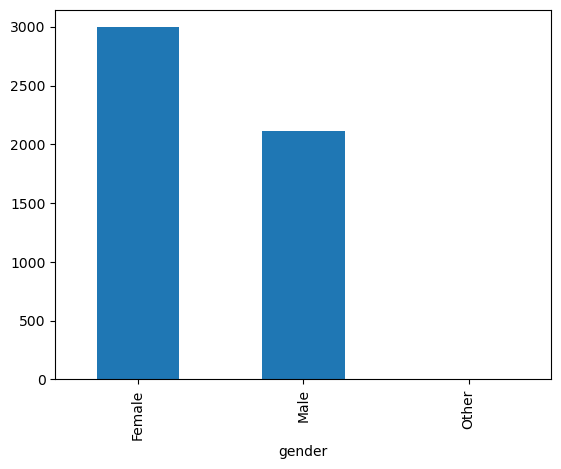

In [7]:
#plot by gender
data.groupby('gender')['gender'].count().plot(kind='bar')

Because we only have one record of "other", we are not able to do a complete general analysis based on one sample.

In [8]:
#for cleaning, we are going to drop the "other" value
data = data[data['gender']!='Other']
data.shape

(5109, 12)

In [9]:
#Checking for NA values

data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We decided to drop the missing values to ensure our data is uniform, due to the minimum impact (0.4%) on patient records. 

In [10]:
#With the "isnull" we can see if there are any NA values in the data frame, in this case the column bmi has 201 NA values
#drop NA
data = data.dropna()
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
#make the id column the index
data = data.set_index('id').sort_values('id', ascending=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0
72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0


In [12]:
#Statistics summary of avg glucose level and bmi(Body Mass Index)
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


# Creating a new csv file with the cleaned data 

In [13]:
data.to_csv('./data/dataset_stroke.csv')

In [2]:
import pandas as pd

In [3]:
data_new = pd.read_csv('./data/dataset_stroke.csv')
data_new

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
1,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
2,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
3,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
4,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4903,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
4904,72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0
4905,72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0
4906,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1


# Is smoking a key factor in increasing the probability of having a stroke?

In [5]:
#checking the smoking status 
data_new['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [7]:
#we are going to filter out the "unknown" status because it is uncertain if does patients smoke or not 
smoking = data_new[data_new['smoking_status']!='Unknown']
smoking

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
2,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
4,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
5,156,Female,33.0,0,0,Yes,Private,Rural,86.97,42.2,never smoked,0
7,187,Female,20.0,0,0,No,Private,Rural,84.07,27.6,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4898,72824,Male,46.0,0,0,Yes,Private,Rural,59.05,28.3,formerly smoked,0
4900,72861,Female,52.0,0,0,Yes,Private,Urban,69.30,20.1,never smoked,0
4902,72882,Male,47.0,0,0,Yes,Private,Rural,75.30,25.0,formerly smoked,0
4903,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0


In [10]:
import matplotlib.pyplot as plt

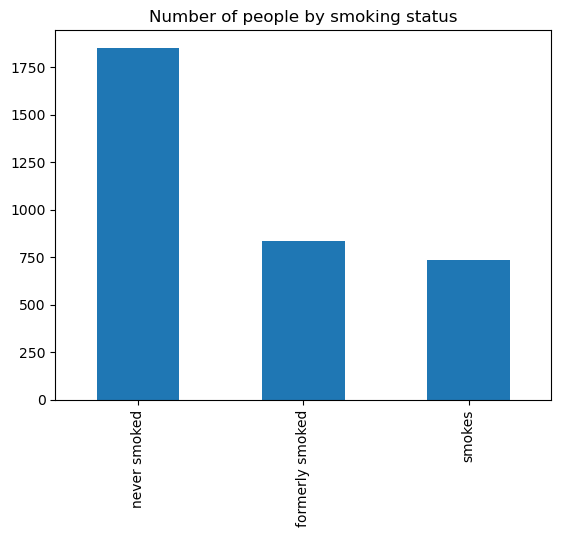

In [11]:
#bar plot for better data visualization
smoking['smoking_status'].value_counts().plot(kind='bar',title='Number of people by smoking status')
plt.show()

In [25]:
#compare the smoking status and stroke 
smoking.groupby('stroke')['smoking_status'].value_counts()

stroke  smoking_status 
0       never smoked       1768
        formerly smoked     779
        smokes              698
1       never smoked         84
        formerly smoked      57
        smokes               39
Name: smoking_status, dtype: int64

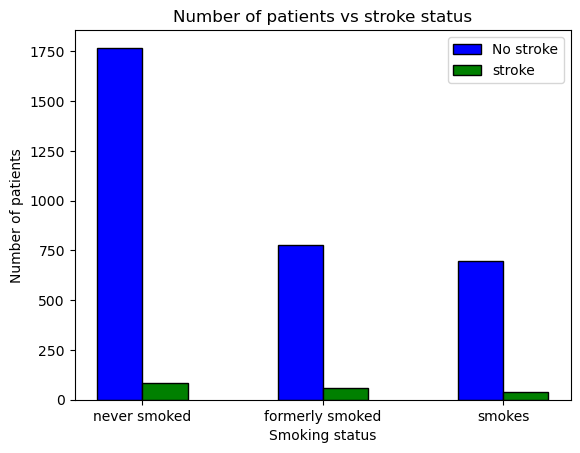

In [29]:
#visual comparation
import numpy as np
stroke_no=[1768,779,698]
stroke_ye=[84,57,39]

n=3
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, stroke_no, color = 'b',
        width = width, edgecolor = 'black',
        label='No stroke')
plt.bar(r + width, stroke_ye, color = 'g',
        width = width, edgecolor = 'black',
        label='stroke')
  
plt.xlabel("Smoking status")
plt.ylabel("Number of patients")
plt.title("Number of patients vs stroke status")
  

plt.xticks(r + width/2,['never smoked','formerly smoked','smokes'])
plt.legend()
  
plt.show()

In [37]:
#compare the proportions number of positive strokes with the patients who ever smoked in their life time and the ones that didn´t

smoking_stroke = pd.DataFrame({
    'smoking status': ['never smoked', 'ever smoked'],
    'number of patients': [1852,1573],
    'number of patients who had a stroke':[84,96]
})
smoking_stroke['% of patients who had a stroke']= (smoking_stroke['number of patients who had a stroke']/smoking_stroke['number of patients'])*100

smoking_stroke 

,smoking status,number of patients,number of patients who had a stroke,% of patients who had a stroke
0,never smoked,1852,84,4.535637
1,ever smoked,1573,96,6.102988


# Is having a heart disease and hypertension considered as risks factors?

In [43]:
#Visualizing the data of herat disease and hypertension
hyper = data_new['hypertension'].value_counts()
hyper

0    4457
1     451
Name: hypertension, dtype: int64

In [44]:
heart = data_new['heart_disease'].value_counts()
heart

0    4665
1     243
Name: heart_disease, dtype: int64

In [45]:
stroke = data_new['stroke'].value_counts()
stroke

0    4699
1     209
Name: stroke, dtype: int64

In [48]:
#patientes who had a stroke and hypertension
data_new.groupby('hypertension')['stroke'].value_counts()

hypertension  stroke
0             0         4308
              1          149
1             0          391
              1           60
Name: stroke, dtype: int64

In [49]:
#patientes who had a stroke and heart_disease
data_new.groupby('heart_disease')['stroke'].value_counts()

heart_disease  stroke
0              0         4496
               1          169
1              0          203
               1           40
Name: stroke, dtype: int64

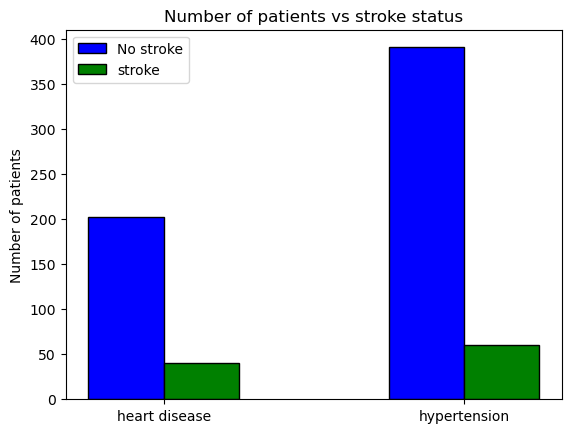

In [55]:
#viusal representation
stroke_no=[203,391]
stroke_ye=[40,60]

n=2
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, stroke_no, color = 'b',
        width = width, edgecolor = 'black',
        label='No stroke')
plt.bar(r + width, stroke_ye, color = 'g',
        width = width, edgecolor = 'black',
        label='stroke')
  

plt.ylabel("Number of patients")
plt.title("Number of patients vs stroke status")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['heart disease','hypertension'])
plt.legend()
  
plt.show()

In [57]:
#patientes with heart disease and hypetension 
heart_hy = data_new.loc[(data_new['heart_disease']==1)&(data_new['hypertension']==1)]
heart_hy

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
10,239,Male,59.0,1,1,Yes,Private,Rural,246.53,27.2,formerly smoked,0
39,712,Female,82.0,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1
148,2750,Male,73.0,1,1,Yes,Self-employed,Rural,230.68,37.7,Unknown,0
165,2952,Male,70.0,1,1,Yes,Private,Rural,93.62,35.8,never smoked,0
518,8009,Female,72.0,1,1,Yes,Private,Urban,217.79,26.1,formerly smoked,0
676,10538,Male,75.0,1,1,Yes,Self-employed,Urban,195.03,28.7,formerly smoked,0
923,14000,Female,72.0,1,1,Yes,Private,Urban,198.32,31.3,formerly smoked,0
1006,15241,Female,63.0,1,1,No,Govt_job,Urban,174.43,24.3,never smoked,0
1020,15415,Male,41.0,1,1,Yes,Private,Urban,94.47,43.9,never smoked,0
1024,15464,Female,71.0,1,1,Yes,Private,Rural,221.24,24.2,Unknown,0


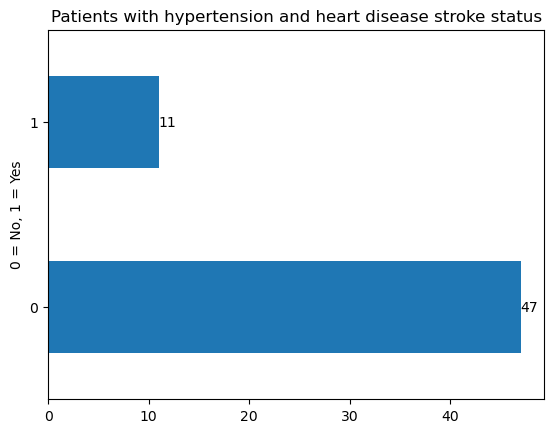

In [69]:
bar_plot = heart_hy['stroke'].value_counts().plot(kind='barh', title='Patients with hypertension and heart disease stroke status',ylabel='0 = No, 1 = Yes')
bar_plot.bar_label(bar_plot.containers[0])
plt.show()

In [62]:
#patients who don´t have hypertencion and heart disease
noneh = data_new.loc[(data_new['heart_disease']==0)&(data_new['hypertension']==0)]
noneh['stroke'].value_counts()

0    4152
1     120
Name: stroke, dtype: int64

In [65]:
#Data frame for compareing the data 
heart_stroke = pd.DataFrame({
    'Disease': ['Hypertension', 'Heart Disease', 'Both','None'],
    'number of patients': [451,243,58,4152],
    'number of patients who had a stroke':[60,40,11,120]
})
heart_stroke['% of patients who had a stroke']= (heart_stroke['number of patients who had a stroke']/heart_stroke['number of patients'])*100

heart_stroke 

,Disease,number of patients,number of patients who had a stroke,% of patients who had a stroke
0,Hypertension,451,60,13.303769
1,Heart Disease,243,40,16.460905
2,Both,58,11,18.965517
3,None,4152,120,2.890173
